In [97]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [88]:
code = '035720' # 카카오 종목코드
page = 100 # 크롤 희망 페이지 (페이지당 20개 댓글)

date_list = []
comment_list = []
good_list = []
bad_list = []

for i in range(1,page+1):
    url = f'https://finance.naver.com/item/board.naver?code={code}&page={i}'
    headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36 Edg/100.0.1185.50'}
    res = requests.get(url, headers = headers)
    bs = BeautifulSoup(res.text, 'html.parser')
    
    for j in range(20):
        root = bs.find('div',{'class':'section inner_sub'}).find_all('tr',{'onmouseover':'mouseOver(this)'})[j].text.split('\n')
        
        date_list.append(root[1].split()[0].replace('.','-'))
        if root[3] == '':
            comment_list.append('답글:'+root[4])
            good_list.append(root[11])
            bad_list.append(root[12])
        else:
            comment_list.append(root[3])
            good_list.append(root[10])
            bad_list.append(root[11])
    
    if i % 10 == 0:
        print(f'{i}페이지 크롤링 완료')
    

10페이지 크롤링 완료
20페이지 크롤링 완료
30페이지 크롤링 완료
40페이지 크롤링 완료
50페이지 크롤링 완료
60페이지 크롤링 완료
70페이지 크롤링 완료
80페이지 크롤링 완료
90페이지 크롤링 완료
100페이지 크롤링 완료


In [89]:
df = pd.DataFrame()
df['날짜'] = date_list
df['댓글'] = comment_list
df['좋아요'] = good_list
df['싫어요'] = bad_list

<function matplotlib.pyplot.show(close=None, block=None)>

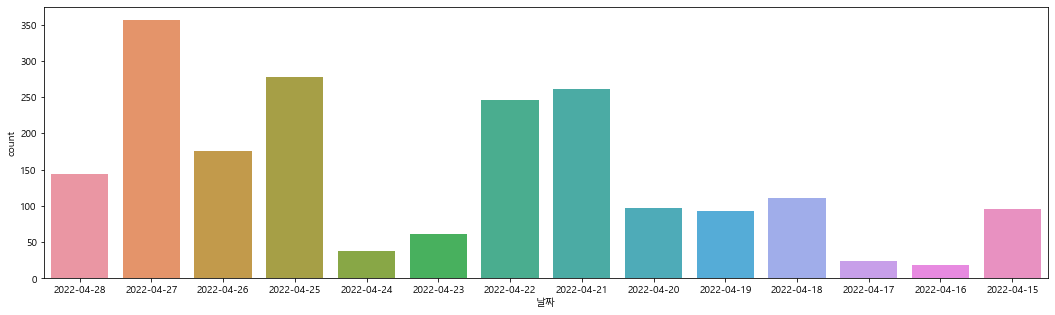

In [100]:
plt.figure(figsize=(18,5))
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.countplot(df['날짜'])
plt.show

In [101]:
df

,날짜,댓글,좋아요,싫어요
0,2022-04-28,덕유산에서 내려 왔습니다,0,0
1,2022-04-28,카카오 ㅅㅂ,2,0
2,2022-04-28,이거 버블 꺼지면,0,0
3,2022-04-28,와 오늘 카카오폭등 축하드려요,2,1
4,2022-04-28,내가 주가 올림,3,0
...,...,...,...,...
1995,2022-04-15,윤무당 좋빠가때문에 개폭락,5,4
1996,2022-04-15,힘을 못 쓰네요,1,0
1997,2022-04-15,젤 빡치는건,0,0
1998,2022-04-15,수급이 문제여~ㅉㅉㅉ,2,0


In [103]:
comment_list

['덕유산에서 내려 왔습니다',
 '카카오 ㅅㅂ',
 '이거 버블 꺼지면',
 '와 오늘 카카오폭등 축하드려요',
 '내가 주가 올림',
 '작전주 리스트',
 '요새 필수 소비재가 중요하다더만',
 '너땜에 돈물려잇어서',
 '배당금 53원ㅋㅋㅋㅋㅋㅋㅋㅋ',
 '엔,원달러심상치않네,뭔가숨어있는듯..',
 '코스피 만약에 터져서 나락간다고 하면',
 '59,0000원에서 액아뤼 쩌ㅓㅓㅓㅓ억',
 '프로그램 들어 오면 다 들어 온다 상 가...',
 '깨깨오야 아프지마',
 '하루에 100원 200원 300원',
 '2시부터 갑자기 던지노',
 '??,추매찬스??',
 '카카오홧김에사봄',
 '7만원에 아과리 쩌억~~~~',
 '시총 10위 밖으로 고고싱중',
 '카카오여 조금만 더 힘을 내라~!',
 '얼마나 잡주면 아가리 쩍충들도 없을까.....',
 '오늘자 신문 기서 보이까나~!',
 '내일 또 2000원 하락이구나.',
 '팍팍좀 하락해라',
 '■ 카카오 2분기 영업이익 추정치  20...',
 '하락할땐 기본2000원이고  상승은200...',
 '죽어도 쪼개기 상장은 포기 안 할듯',
 '미 나스닥',
 '범수 대께문이여~! 유상증자를 단행하라~...',
 '점심도 먹었는데 빨리 빨리 올라가자',
 '올해 안에 48000원 간다.',
 '카카오 그룹주 전부 반토막=경영진 리스크',
 '■ 메타플랫폼 CEO 저커버그 ㅡ 2분기...',
 '카카오 신사업 상장',
 '티끌모아 태산',
 '-40%넘으니까',
 '먹튀기업 ㆍ가즈아',
 '카카오 퀴즈퀴즈쇼!!!!!!!!!!!!!...',
 '카카오 5만따리 가겠죠?',
 '개카오 그룹주는 고점대비 다 반 타작이구...',
 '외국인 형님도 왔구만 빨리 빨리 올라가자',
 '10층이하 징징 대지마라',
 '남은 성장동력이 있다면 그것마저 상장하겠...',
 '머리가지고 머라하진 말자',
 '성탄절이 토요일, 일요일일 경우 월요일을...',
 '카카오',
 '이게 기술적 반등인가요?',
 '치킨이 2만원인데